#### Synthea Health: Data Analysis and Insights Generation

!pip install -r requirements.txt

#### Exploratory Data Analysis

In [6]:
#import the required funcions and packages for EDA

import pandas as pd
from utils.utils import read_data_parse_dates,get_demographic_plot
import json
import plotly.express as px

In [7]:
config_file_path = './config/config.json'

# Load the JSON file
with open(config_file_path, 'r') as file:
    config = json.load(file)

# Access the value of 'input_folder'
output_folder = config.get('cleaned_data_path')
print("output Folder:", output_folder)

output Folder: C://Users//veena.vemula//Documents//GitHub//SDE-Skills-Test//Output


In [8]:
!pip install -U kaleido

#### Read the cleaned and transformed files from Output folder

In [10]:
df_patients =  read_data_parse_dates(output_folder,"patients_cleaned",["BIRTHDATE"])
df_encounters =  read_data_parse_dates(output_folder,"encounters_cleaned",["START_ENC","STOP_ENC"])
df_conditions =  read_data_parse_dates(output_folder,"conditions_cleaned",["START_DIAG","STOP_DIAG"])
df_medications =  read_data_parse_dates(output_folder,"medications_cleaned",["START_MED","STOP_MED"])
df_procedures =  read_data_parse_dates(output_folder,"procedures_cleaned",["START_PROC","STOP_PROC"])

In [11]:
## number of visits per patient

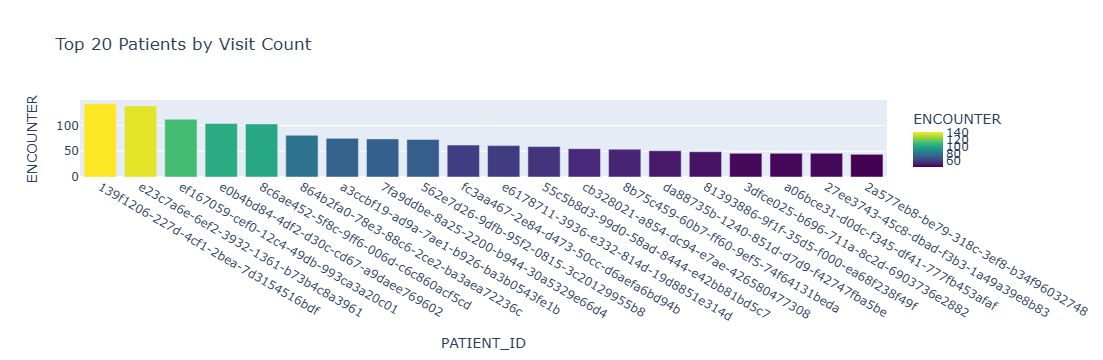

In [12]:
df_pat_cond = pd.merge(df_conditions, df_patients, on='PATIENT_ID', how='inner')
visit_count = df_pat_cond.groupby('PATIENT_ID')['ENCOUNTER'].nunique().reset_index()
result_df_sorted = visit_count.sort_values(by='ENCOUNTER',ascending=False).head(20)
fig = px.bar(result_df_sorted, x='PATIENT_ID', y='ENCOUNTER', title="Top 20 Patients by Visit Count",
             labels={'name': 'Patient Name', 'visit_count': 'Number of Visits'},
             color='ENCOUNTER', color_continuous_scale='Viridis')
fig.write_html("./output/data_visualization/top_patient_by_visit.html")
fig.to_image(format = "png")
fig.show()


Above visual - Visit count by patient dint gave any insights except highest vist of patient is 140 and lowest is as low as one to two over the span of 70 years . we will look in to visits by Age group 


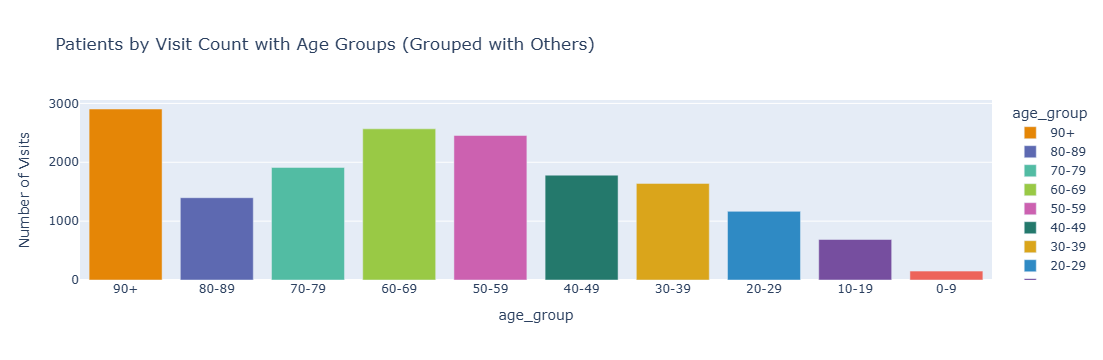

In [86]:

# Merge DataFrames and include age group
df_pat_cond = pd.merge(df_conditions, df_patients, on='PATIENT_ID', how='inner')

# Group by PATIENT_ID and AGE_GROUP, then count unique encounters
visit_count = df_pat_cond.groupby(['age_group'])['ENCOUNTER'].nunique().reset_index()

# Sort by visit count and extract top 20
visit_count_sorted = visit_count.sort_values(by='age_group', ascending=False)
top_20 = visit_count_sorted

# Calculate "Others" group for each age group
#remaining = visit_count_sorted.iloc[20:]
#others = remaining.groupby('age_group')['ENCOUNTER'].sum().reset_index()
#others['PATIENT_ID'] = 'Others'

# Combine top 20 and "Others"
result_df = top_20

# Create bar chart with color representing age groups
fig = px.bar(result_df, 
             x='age_group', 
             y='ENCOUNTER', 
             color='age_group',
             title="Patients by Visit Count with Age Groups (Grouped with Others)",
             labels={'PATIENT_ID': 'Patient ID', 'ENCOUNTER': 'Number of Visits', 'AGE_GROUP': 'Age Group'},
             color_discrete_sequence=px.colors.qualitative.Vivid)

# Save and display
fig.write_html("./output/data_visualization/top_patient_by_visit_age_groups.html")
fig.to_image(format = "png")
fig.show()


Above chart infers
 90+ age group has highest number of visits
 Age group 80-89 and 20-29 have almost same number of visit - decrease in number of vsits to age group 80-89
 Rest all follows a natural trend without any spikes in data
 

In [16]:
df_pat_cond.head(5)

START_DIAG  STOP_DIAG                            PATIENT_ID  \
0 2013-06-24 2013-07-02  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
1 2016-02-27 2016-03-14  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
2 2016-08-11 2016-08-22  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
3 2016-11-27 2016-12-17  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
4 2017-02-22 2017-06-02  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   

                              ENCOUNTER       CODE  \
0  0b2794bd-ec2b-d34f-0610-2523b3b7fcf0   10509002   
1  a6d818dd-0983-fd1c-eefa-3d2295532c45  283371005   
2  36d2e781-4655-0a11-1f70-c69856e02019  444814009   
3  c8eaaf41-958b-31ab-7de5-568cee8751f3  444814009   
4  6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e   16114001   

                   DESCRIPTION  BIRTHDATE DEATHDATE          SSN    DRIVERS  \
0  Acute bronchitis (disorder) 2005-07-04       NaN  999-49-3323  S99941126   
1        Laceration of forearm 2005-07-04       NaN  999-49-3323  S99941126   
2   Viral sinusitis (disorder) 2005-07-04       NaN  999-49-3323  S99941126   
3   Viral sinusitis (disorder) 2005-07-04       NaN  999-49-3323  S99941126   
4            Fracture of ankle 2005-07-04       NaN  999-49-3323  S99941126   

   ...        CITY          STATE          COUNTY ZIP        LAT        LON  \
0  ...  Bellingham  Massachusetts  Norfolk County NaN  42.035213 -71.482519   
1  ...  Bellingham  Massachusetts  Norfolk County NaN  42.035213 -71.482519   
2  ...  Bellingham  Massachusetts  Norfolk County NaN  42.035213 -71.482519   
3  ...  Bellingham  Massachusetts  Norfolk County NaN  42.035213 -71.482519   
4  ...  Bellingham  Massachusetts  Norfolk County NaN  42.035213 -71.482519   

  HEALTHCARE_EXPENSES HEALTHCARE_COVERAGE        age age_group  
0          402723.415           14064.135  19.430137     10-19  
1          402723.415           14064.135  19.430137     10-19  
2          402723.415           14064.135  19.430137     10-19  
3          402723.415           14064.135  19.430137     10-19  
4          402723.415           14064.135  19.430137     10-19  

[5 rows x 32 columns]

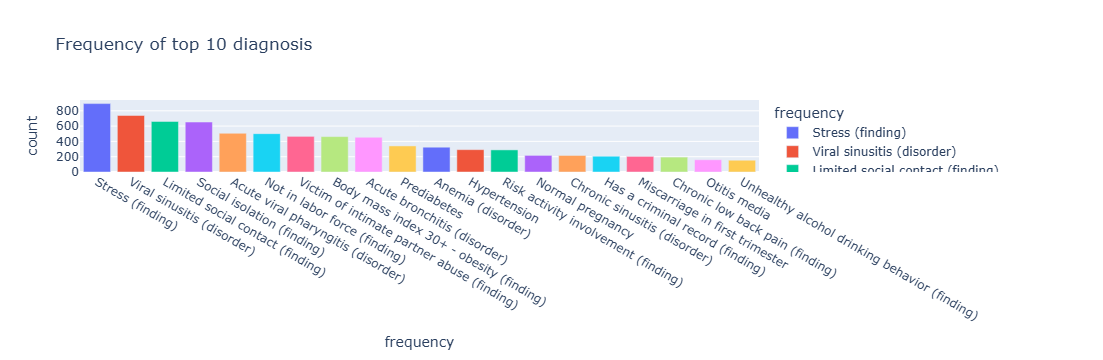

In [88]:
## frequency of certain diagnoses etc.
df_diag_freq = df_pat_cond[["PATIENT_ID","DESCRIPTION"]].drop_duplicates()["DESCRIPTION"].value_counts().reset_index().rename({"index":"Diagnosis","DESCRIPTION":"frequency"},axis=1).head(20)

fig = px.bar(df_diag_freq, x='frequency', y='count', title="Frequency of top 10 diagnosis",
             labels={'name': 'Diagnosis', 'frequency': 'frequency'},
             color='frequency', color_continuous_scale='Viridis')
fig.write_html("./output/data_visualization/top100diagfreq.html")
fig.to_image(format = "png")
fig.show()



From above graph we can infer Stress, Sinusitis , social isolation are high in number 

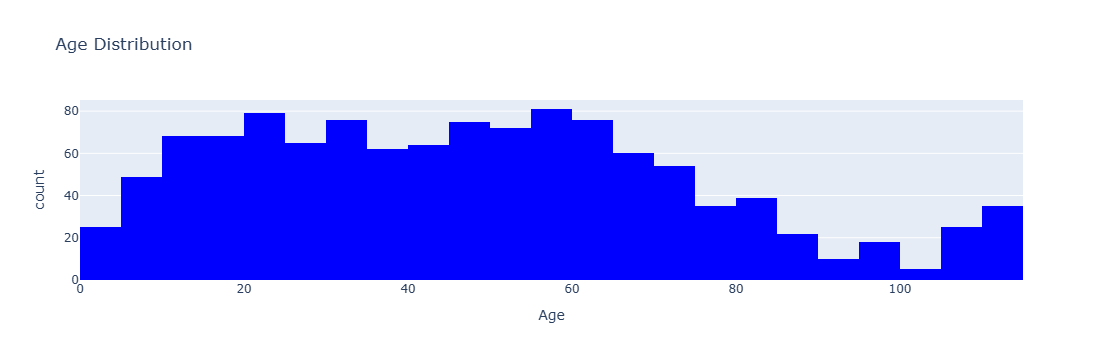

In [90]:
# Age dist
fig = px.histogram(df_patients, x='age',
                   title="Age Distribution",
                   labels={'age': 'Age'},
                      # Number of bins for grouping ages
                   color_discrete_sequence=['blue'])

# Show the plot
fig.to_image(format = "png")
fig.show()

Age distribution follows normal distribution. The spread seems to be normal except there is unusual hike after 100 yeras

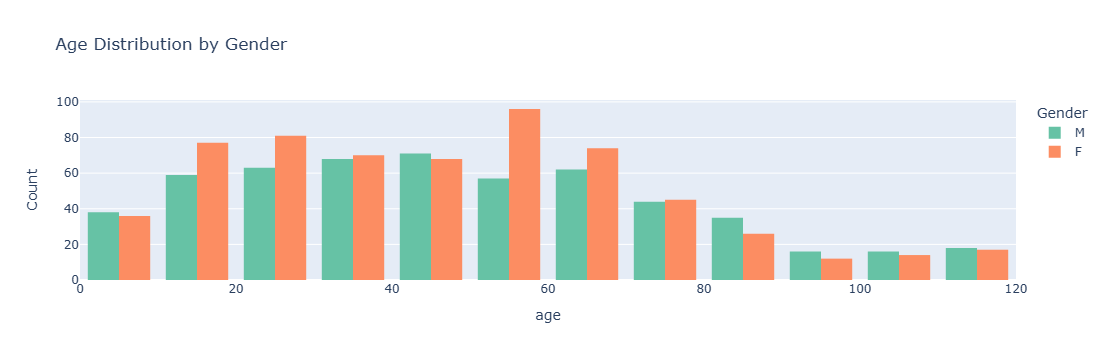

In [92]:
# Age Distribution by Gender
fig = px.histogram(
    df_patients,
    x='age',  # Ensure the column name matches your DataFrame
    title="Age Distribution by Gender",
    labels={'AGE': 'Age', 'GENDER': 'Gender'},
    nbins=20,  # Adjust the number of bins for grouping ages
    color='GENDER',  # Differentiate by gender
    color_discrete_sequence=px.colors.qualitative.Set2  # Use a color palette
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="age",
    yaxis_title="Count",
    legend_title="Gender",
    barmode='group'  # Group bars for better comparison
)

# Show the plot
fig.to_image(format = "png")
fig.show()


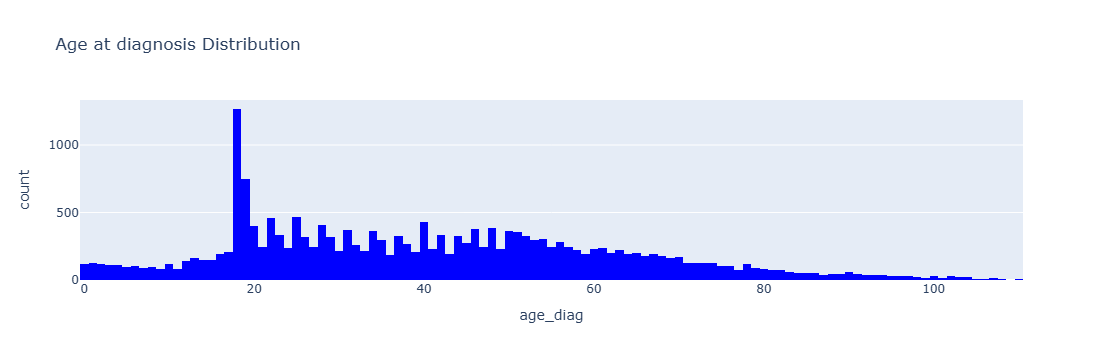

In [94]:
## lets calculate the age at each diag 
df_pat_cond["age_diag"] = df_pat_cond["START_DIAG"].dt.year-df_pat_cond["BIRTHDATE"].dt.year
# Age dist
fig = px.histogram(df_pat_cond, x='age_diag',
                   title="Age at diagnosis Distribution",
                   labels={'age': 'age_diag'},
                      # Number of bins for grouping ages
                   color_discrete_sequence=['blue'])

# Show the plot
fig.write_html("./output/data_visualization/diag_age_distribution.html")
fig.to_image(format = "png")
fig.show()

In [23]:
df_pat_cond.columns

Index(['START_DIAG', 'STOP_DIAG', 'PATIENT_ID', 'ENCOUNTER', 'CODE',
       'DESCRIPTION', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'age', 'age_group', 'age_diag'],
      dtype='object')

                                    Frequency  count
0                            Stress (finding)     81
1            Limited social contact (finding)     39
2                  Social isolation (finding)     34
3                            Normal pregnancy     23
4                Not in labor force (finding)     16
5  Victim of intimate partner abuse (finding)     14
6                  Viral sinusitis (disorder)     12
7                           Anemia (disorder)     12
8  Lack of access to transportation (finding)     10
9                 Acute bronchitis (disorder)     10


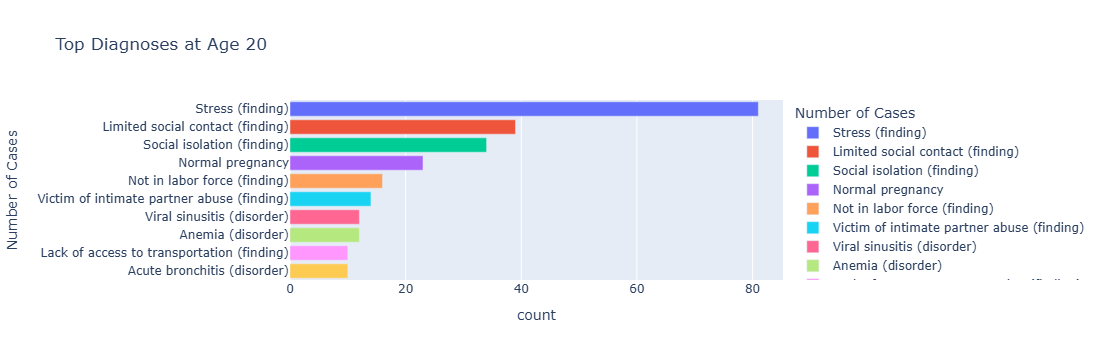

In [96]:
# Filter diagnoses at age 20
df_pat_cond["age_diag"] = df_pat_cond["START_DIAG"].dt.year-df_pat_cond["BIRTHDATE"].dt.year
# Age dist
age_20_diag = df_pat_cond[df_pat_cond["age_diag"] == 20]

# Calculate frequency of diagnoses at age 20
age_20_diag_freq = (
    age_20_diag["DESCRIPTION"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "count", "DESCRIPTION": "Frequency"})
)

# Display the top diagnoses causing the spike
print(age_20_diag_freq.head(10))  # Top 10 diagnoses at age 20

# Optional: Visualize the diagnoses at age 20
fig = px.bar(
    age_20_diag_freq.head(10),
    x="count",
    y="Frequency",
    title="Top Diagnoses at Age 20",
    labels={"Frequency": "Number of Cases", "Diagnosis": "Diagnosis"},
    orientation="h",
    color="Frequency",
    color_continuous_scale="Viridis",
       
)

# Save and show the visualization
fig.write_html("./output/data_visualization/top_diagnoses_age_20.html")
fig.to_image(format = "png")
fig.show()


In [25]:
df_pat_cond.to_csv("./output/diagnosis_data.csv",index=False)

In [ ]:
df_pat_cond.head(5)

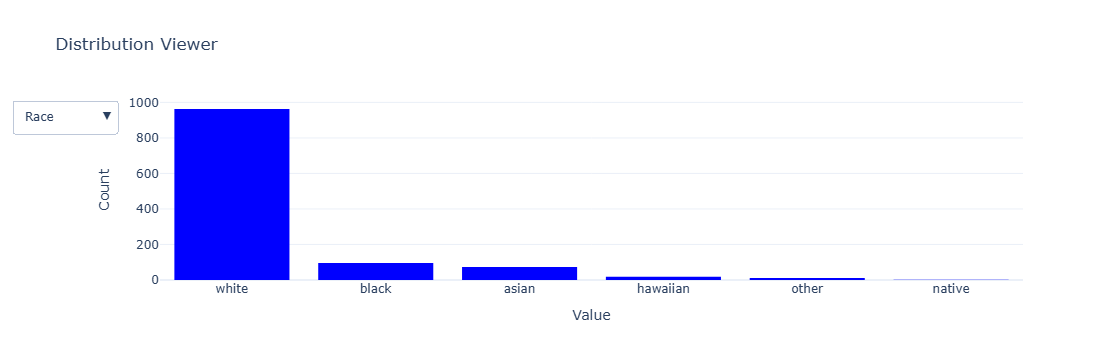

In [104]:
#•	The distribution of patients by age, gender
import plotly.graph_objects as go
fig = go.Figure()

# Add traces for Age, Gender, and Race
fig.add_trace(go.Histogram(x=df_patients['RACE'], name='Race', marker=dict(color='blue'), visible=True))
fig.add_trace(go.Histogram(x=df_patients['GENDER'], name='Gender', marker=dict(color='green'), visible=False))
fig.add_trace(go.Histogram(x=df_patients['age_group'], name='age_group', marker=dict(color='orange'), visible=False))

# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            buttons=[
                dict(label="Race",
                     method="update",
                     args=[{"visible": [True, False, False]},  
                           {"title": "Race Distribution"}]),
                dict(label="Gender",
                     method="update",
                     args=[{"visible": [False, True, False]},  
                           {"title": "Gender Distribution"}]),
                dict(label="age_group",
                     method="update",
                     args=[{"visible": [False, False, True]},  
                           {"title": "Age Distribution"}])
            ],
            showactive=True
        )
    ]
)

# Add layout details
fig.update_layout(
    title="Distribution Viewer",
    xaxis_title="Value",
    yaxis_title="Count",
    template="plotly_white"
)
fig.write_html("./output/data_visualization/distribution_gender_age_race.html")
fig.to_image(format = "png")
# Show the figure
fig.show()


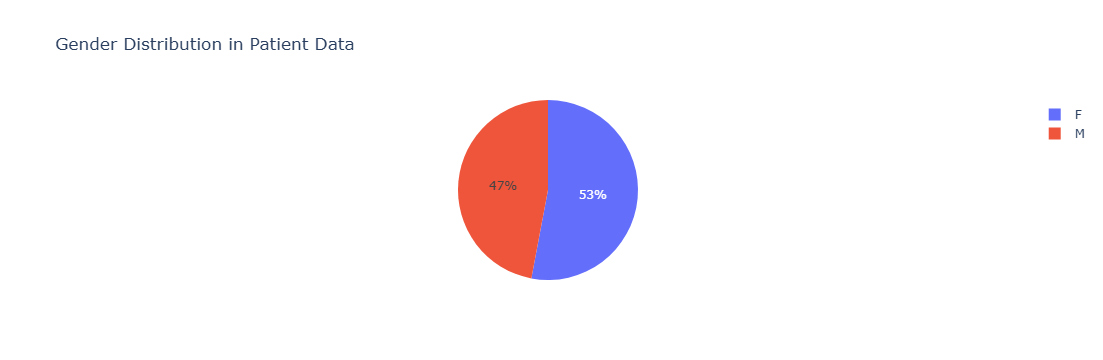

In [102]:
fig = px.pie(df_patients, names='GENDER', title="Gender Distribution in Patient Data")

# Show the chart
fig.write_html("./output/data_visualization/distribution_gender_pie.html")
fig.to_image(format = "png")

fig.show()

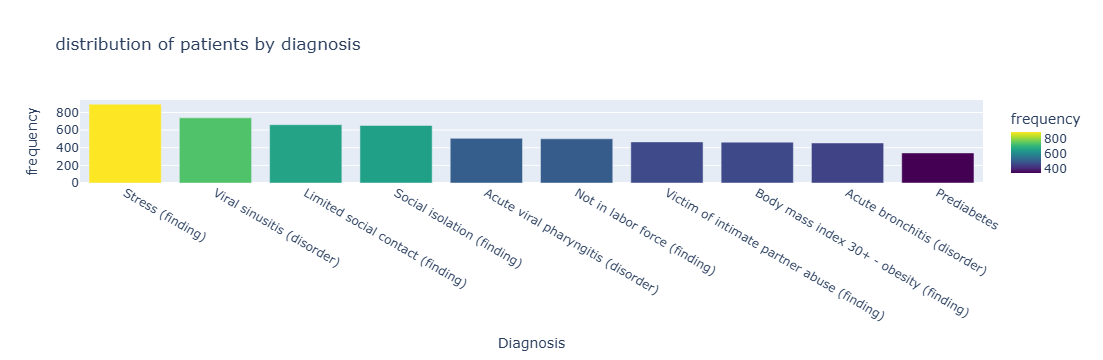

In [106]:
#•	The distribution of patients  by diagonisis
## 
df_diag_freq = df_pat_cond[["PATIENT_ID","DESCRIPTION"]].drop_duplicates()["DESCRIPTION"].value_counts().reset_index().rename({"count":"frequency","DESCRIPTION":"Diagnosis"},axis=1)
# Select only the top 10 diagnoses
df_diag_freq_top = df_diag_freq.head(10)

fig = px.bar(df_diag_freq_top, x='Diagnosis', y='frequency', title="distribution of patients by diagnosis",
             labels={'name': 'Diagnosis', 'frequency': 'frequency'},
             color='frequency', color_continuous_scale='Viridis')
fig.write_html("./output/data_visualization/distribution_diag.html")
fig.to_image(format = "png")
fig.show()

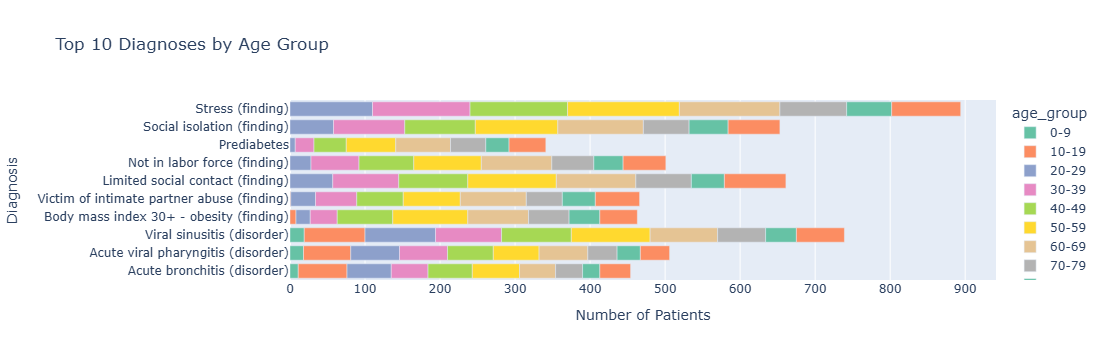

In [108]:

# Group by diagnosis and age group to get frequency
df_diag_age_group = (
    df_pat_cond.groupby(["DESCRIPTION", "age_group"])["PATIENT_ID"]
    .nunique()
    .reset_index()
    .rename(columns={"DESCRIPTION": "Diagnosis", "PATIENT_ID": "Frequency"})
)

# Select top 10 diagnoses
top_10_diagnoses = (
    df_diag_age_group.groupby("Diagnosis")["Frequency"].sum()
    .nlargest(10)
    .index
)
df_diag_age_group_top = df_diag_age_group[df_diag_age_group["Diagnosis"].isin(top_10_diagnoses)]

# Create stacked bar chart
fig = px.bar(
    df_diag_age_group_top,
    x="Frequency",
    y="Diagnosis",
    color="age_group",
    title="Top 10 Diagnoses by Age Group",
    labels={"Frequency": "Number of Patients", "Diagnosis": "Diagnosis", "AGE_GROUP": "Age Group"},
    orientation="h",
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Save and show the visualization
fig.write_html("./output/data_visualization/top10_diagnoses_age_group.html")
fig.to_image(format = "png")
fig.show()


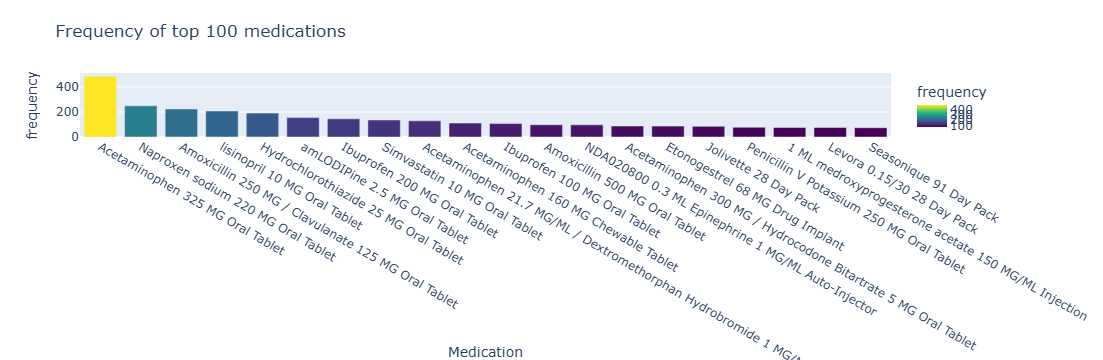

In [110]:
#•	The most frequent medications
## 
df_med_freq = df_medications[["PATIENT_ID","DESCRIPTION"]].drop_duplicates()["DESCRIPTION"].value_counts().reset_index().rename({"count":"frequency","DESCRIPTION":"Medication"},axis=1).head(20)

fig = px.bar(df_med_freq, x='Medication', y='frequency', title="Frequency of top 100 medications",
             labels={'name': 'Medication', 'frequency': 'frequency'},
             color='frequency', color_continuous_scale='Viridis')
fig.write_html("./output/data_visualization/top100medicationfreq.html")
fig.to_image(format = "png")
fig.show()

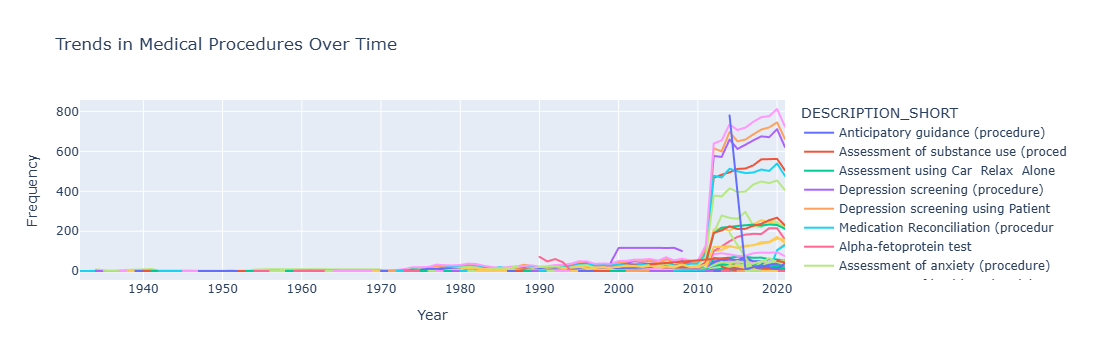

In [112]:
#•	Trends in medical procedures over time.
df_procedures["DESCRIPTION_SHORT"] = df_procedures['DESCRIPTION'].str.slice(0, 35)
procedure_trends = df_procedures.groupby(['Year', 'DESCRIPTION_SHORT']).size().reset_index(name='Count')
fig = px.line(procedure_trends, 
              x='Year', 
              y='Count', 
              color='DESCRIPTION_SHORT', 
              line_group='DESCRIPTION_SHORT', 
              title='Trends in Medical Procedures Over Time',
              labels={'procedure_desc': 'Procedure', 'Count': 'Frequency'})
fig.write_html("./output/data_visualization/trend_procedure_time.html")
fig.to_image(format = "png")
fig.show()
## description is too long lets slice it
#1. WE clearly see that in early 60s/70s we were having less number of procedures known and implemented compared to 20s
#2. renal dialsis were not present untill 1990s
#3. when look at depression screening earlier in 90s they were in less number but now it has become common and more frequent.
#4. from the data or subset of data we can see that "chemotherapy" was not present earlier but 2000s it has been more frequent

C:\Users\veena.vemula\AppData\Local\Temp\ipykernel_11420\536863353.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



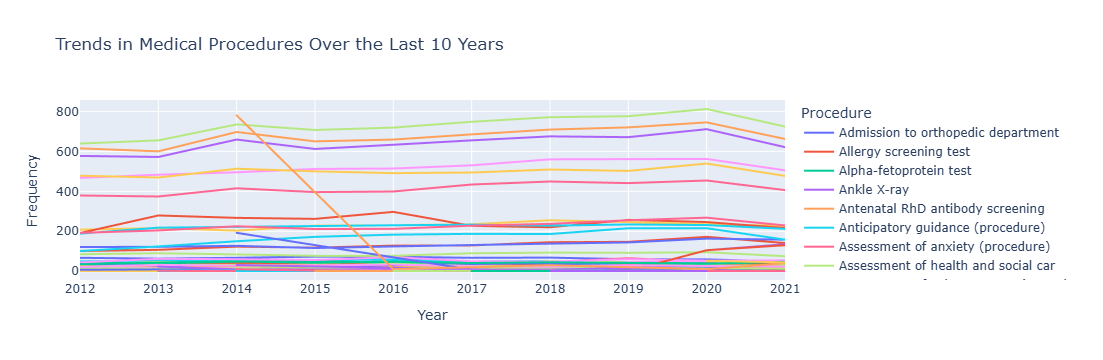

In [114]:
# Filter procedures for the last 10 years
current_year = df_procedures['Year'].max()
last_10_years = current_year - 9
df_procedures_last_10_years = df_procedures[df_procedures['Year'] >= last_10_years]

# Shorten procedure descriptions for clarity
df_procedures_last_10_years["DESCRIPTION_SHORT"] = df_procedures_last_10_years['DESCRIPTION'].str.slice(0, 35)

# Group by year and procedure description
procedure_trends_last_10_years = (
    df_procedures_last_10_years.groupby(['Year', 'DESCRIPTION_SHORT'])
    .size()
    .reset_index(name='Count')
)

# Create the line chart
fig = px.line(
    procedure_trends_last_10_years,
    x='Year',
    y='Count',
    color='DESCRIPTION_SHORT',
    line_group='DESCRIPTION_SHORT',
    title='Trends in Medical Procedures Over the Last 10 Years',
    labels={'Year': 'Year', 'DESCRIPTION_SHORT': 'Procedure', 'Count': 'Frequency'}
)

# Save and show the visualization
fig.write_html("./output/data_visualization/trend_procedure_last_10_years.html")
fig.to_image(format = "png")
fig.show()


C:\Users\veena.vemula\AppData\Local\Temp\ipykernel_11420\3787298815.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



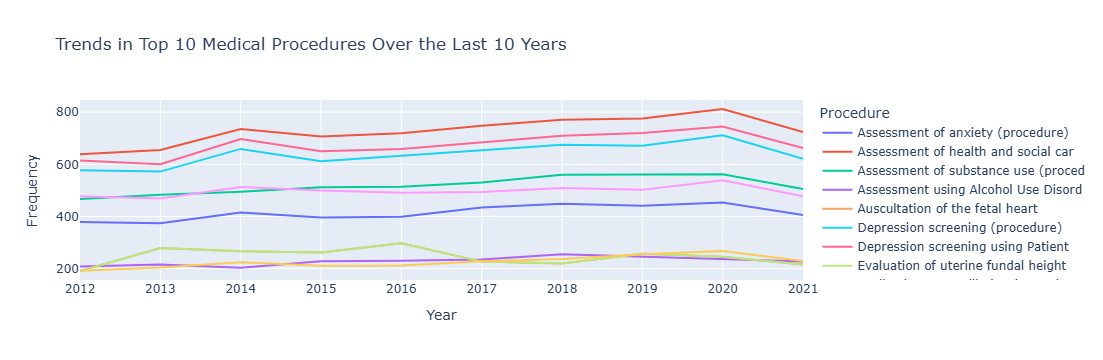

In [116]:
# Filter procedures for the last 10 years
current_year = df_procedures['Year'].max()
last_10_years = current_year - 9
df_procedures_last_10_years = df_procedures[df_procedures['Year'] >= last_10_years]

# Shorten procedure descriptions for clarity
df_procedures_last_10_years["DESCRIPTION_SHORT"] = df_procedures_last_10_years['DESCRIPTION'].str.slice(0, 35)

# Calculate total counts for each procedure
total_procedure_counts = (
    df_procedures_last_10_years.groupby("DESCRIPTION_SHORT").size().reset_index(name='Total_Count')
)

# Select the top 10 most frequent procedures
top_10_procedures = total_procedure_counts.nlargest(10, "Total_Count")["DESCRIPTION_SHORT"]

# Filter data for only the top 10 procedures
procedure_trends_top_10 = df_procedures_last_10_years[
    df_procedures_last_10_years["DESCRIPTION_SHORT"].isin(top_10_procedures)
]

# Group by year and procedure description
procedure_trends_top_10_grouped = (
    procedure_trends_top_10.groupby(['Year', 'DESCRIPTION_SHORT'])
    .size()
    .reset_index(name='Count')
)

# Create the line chart
fig = px.line(
    procedure_trends_top_10_grouped,
    x='Year',
    y='Count',
    color='DESCRIPTION_SHORT',
    line_group='DESCRIPTION_SHORT',
    title='Trends in Top 10 Medical Procedures Over the Last 10 Years',
    labels={'Year': 'Year', 'DESCRIPTION_SHORT': 'Procedure', 'Count': 'Frequency'}
)

# Save and show the visualization
fig.write_html("./output/data_visualization/trend_top_10_procedures_last_10_years.html")
fig.to_image(format = "png")
fig.show()


#### •	Explore the relation nship between patient demographics and diagnosis or medication types.

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]  # Add infinity for 90+
labels = [f"{bins[i]}-{bins[i + 1] - 1}" for i in range(len(bins) - 2)] + [f"{bins[-2]}+"]
df_pat_cond['age_diag_group'] = pd.cut(df_pat_cond['age_diag'], bins=bins, labels=labels, right=False)
df_pat_cond

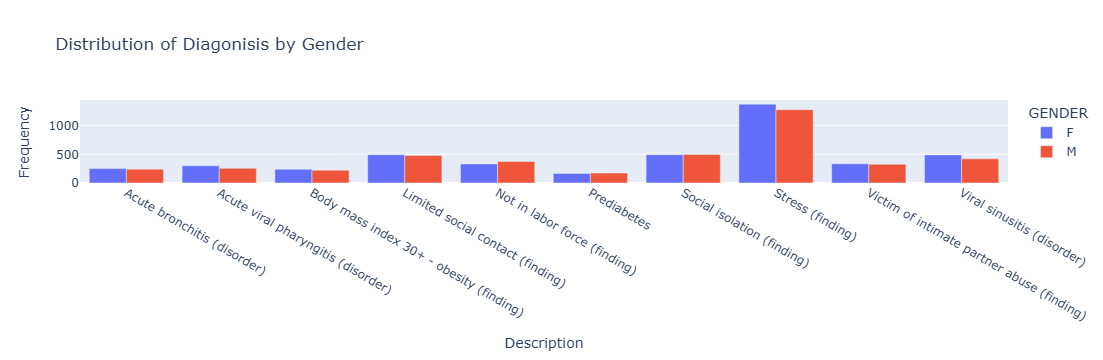

In [140]:
demo_diag_data = df_pat_cond[["PATIENT_ID","age_diag_group","STATE","MARITAL","RACE","ETHNICITY","GENDER","DESCRIPTION"]].drop_duplicates()
fig = get_demographic_plot(demo_diag_data,"GENDER","DESCRIPTION","Distribution of Diagonisis by Gender")
fig.to_image(format = "png")
fig.show()
## Alcohalism,tobacco has seen more in Male, pregnancy and miscariage only in female which shows correcness of data
## neck injury more in female
# impcated morals seen more in female
##?? need to save this fig

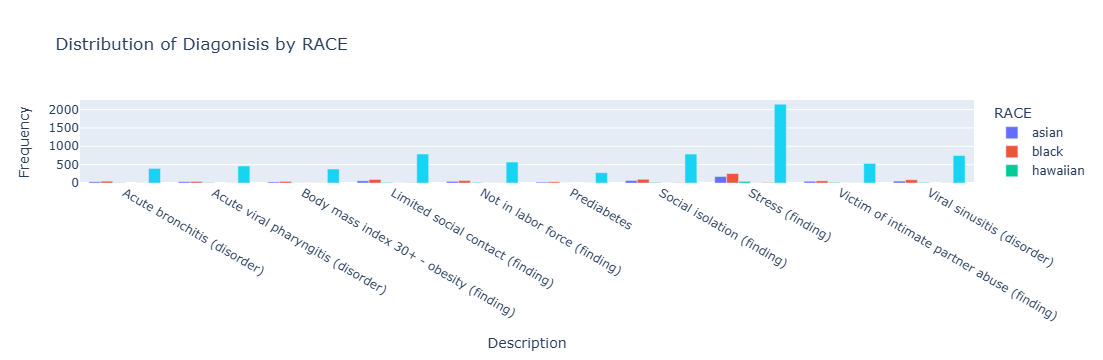

In [142]:
fig = get_demographic_plot(demo_diag_data,"RACE","DESCRIPTION","Distribution of Diagonisis by RACE")
fig.to_image(format = "png")
fig.show()
## Anemia is seen more in white, obesity or high BMI seen more in black and white but less in asian

C:\Users\veena.vemula\Documents\GitHub\SDE-Skills-Test\utils\utils.py:98: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



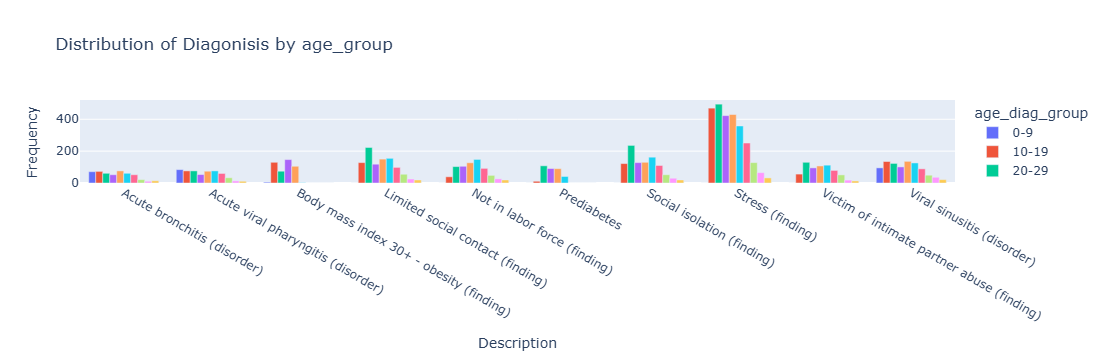

In [124]:
fig_age_grp_diag = get_demographic_plot(demo_diag_data,"age_diag_group","DESCRIPTION","Distribution of Diagonisis by age_group")
fig_age_grp_diag.write_html("./output/data_visualization/fig_age_grp_diag.html")
fig.to_image(format = "png")
fig_age_grp_diag.show()
#osteoporosis seen more in senior citizens
## hpertension seen more in 10-19 years 
## normal pregnanc is more in 20-29 years and reduces furhter

• Explore the relation nship between patient demographics medication types

In [ ]:
df_pat_med = pd.merge(df_medications, df_patients, on='PATIENT_ID', how='inner')
df_pat_med["age_med"] = df_pat_med["START_MED"].dt.year-df_pat_med["BIRTHDATE"].dt.year ## calcualte age at the time of medicine given
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]  # Add infinity for 90+
labels = [f"{bins[i]}-{bins[i + 1] - 1}" for i in range(len(bins) - 2)] + [f"{bins[-2]}+"]
df_pat_med['age_med_group'] = pd.cut(df_pat_med['age_med'], bins=bins, labels=labels, right=False)
df_pat_med

In [ ]:
demo_med_data = df_pat_med[["PATIENT_ID","age_group","STATE","MARITAL","RACE","ETHNICITY","GENDER","DESCRIPTION"]].drop_duplicates()
demo_med_data## removing duplicates on above combination

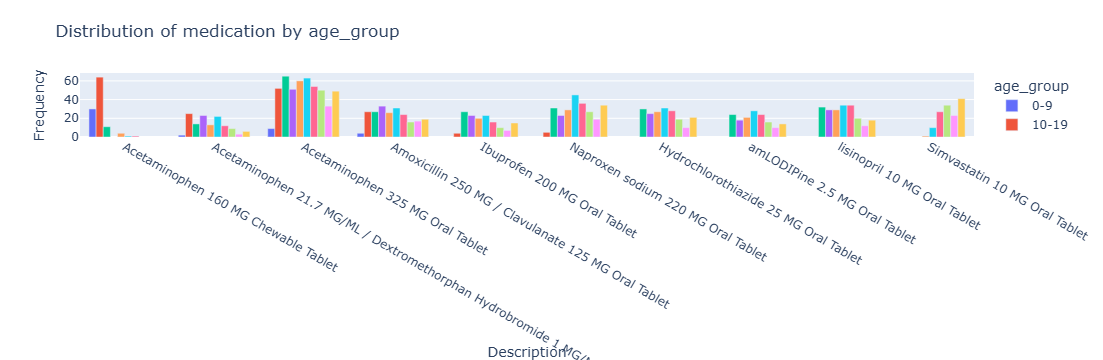

In [134]:
fig =get_demographic_plot(demo_med_data,"age_group","DESCRIPTION","Distribution of medication by age_group")
fig.to_image(format = "png")
fig.show()

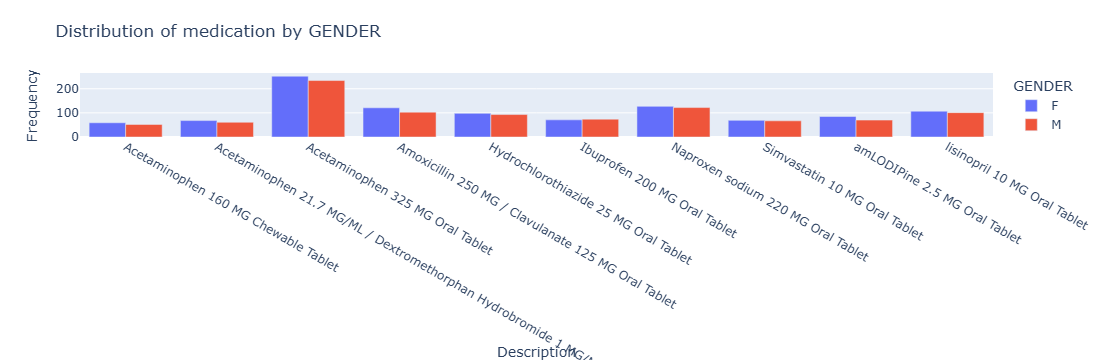

In [132]:
fig = get_demographic_plot(demo_med_data,"GENDER","DESCRIPTION","Distribution of medication by GENDER")
fig.to_image(format = "png")
fig.show()

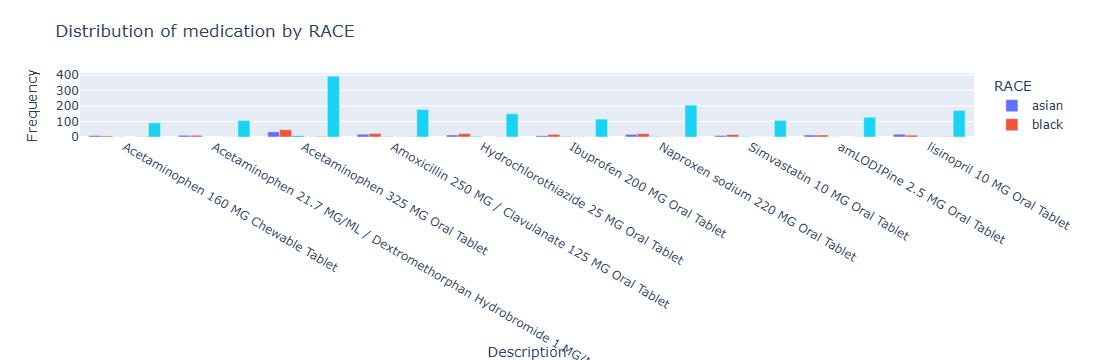

In [130]:
fig = get_demographic_plot(demo_med_data,"RACE","DESCRIPTION","Distribution of medication by RACE")
fig.to_image(format = "png")
fig.show()